## Testing the AVISO Eddy Atlas

In [4]:
! ls aviso/eddy_atlas

aviso_eddy_trajectory_example.py	     hdbk_eddytrajectory_2.0exp.pdf
eddy_trajectory_2.0exp_19930101_20180118.nc


In [6]:
dataset

<xarray.Dataset>
Dimensions:             (obs: 25871877)
Dimensions without coordinates: obs
Data variables:
    amplitude           (obs) float32 ...
    cyclonic_type       (obs) int8 ...
    latitude            (obs) float32 ...
    longitude           (obs) float32 ...
    observation_number  (obs) uint16 ...
    observed_flag       (obs) int8 ...
    speed_average       (obs) float32 ...
    speed_radius        (obs) uint16 ...
    time                (obs) object ...
    track               (obs) uint32 0 0 0 0 0 ... 352416 352416 352416 352416
Attributes:
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    title:                     Mesoscale Eddies in Altimeter Observations of SLA
    institution:               CNES/CLS in collaboration with Oregon State Un...
    project:                   SSALTO/DUACS
    creator_url:               http://www.aviso.altimetry.fr
    creator_email:             aviso@altimetry.fr
    license:                   http://www.aviso.altimetry.fr/fileadmin/docume...
    summary:                   This dataset contains eddy atlas from two-sate...
    comment:                   Surface product; mesoscale eddies
    input_product_reference:   https://www.aviso.altimetry.fr/en/data/product...
    date_created:              2018-09-19T15:34:04Z
    time_coverage_duration:    P9148D
    time_coverage_start:       1993-01-01T00:00:00Z
    time_coverage_end:         2018-01-18T00:00:00Z
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    product_version:           2.0.exp

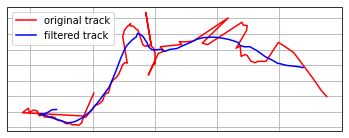

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

# Load dataset with xarray
fp = 'aviso/eddy_atlas/eddy_trajectory_2.0exp_19930101_20180118.nc'
dataset = xr.open_dataset(fp)


# Projection
proj=ccrs.PlateCarree()


#--------------------------------------------------------------------------------
# Follow a given eddy, plot its filtered track superimposed to its real track
#--------------------------------------------------------------------------------
# Select a specific eddy and save
subset = dataset.sel(obs=dataset.track==72553)
# Store selected data
subset.to_netcdf('eddy_trajectory_152014.nc')

# Position filtering with a rolling mean
windows_kwargs = dict(min_periods=7, obs=14, center=True)
new_lon = subset.longitude.rolling(** windows_kwargs).mean()
new_lat = subset.latitude.rolling(** windows_kwargs).mean()

# Create figure
fig = plt.figure()
# Create subplot
ax = fig.add_subplot(111, projection=proj)
# Plot the two tracks
ax.plot(subset.longitude, subset.latitude, color='r', label='original track', transform=proj)
ax.plot(new_lon, new_lat, color='b', label='filtered track', transform=proj)
# Active meridian/parallel
ax.gridlines()
# Active coastline
ax.coastlines()
# Legend
ax.legend()

In [11]:
with xr.open_dataset(fp, decode_cf=False) as h:
    
    lon_min, lon_max, lat_min, lat_max = 1, 5, -28, -27
    t = 25150
    # Select a specific eddy with date and area, only some observations
    subset = h.sel(obs=(h.longitude > lon_min) & (h.longitude < lon_max) & (h.latitude > lat_min) & (h.latitude < lat_max) & (h.time == 25147))
    # Extract full track
    subset = h.isel(obs=np.in1d(h.track, subset.track))
    # Store selected data
    print(subset)
    subset.to_netcdf('output_eddy.nc')

<xarray.Dataset>
Dimensions:             (obs: 0)
Dimensions without coordinates: obs
Data variables:
    amplitude           (obs) float32 ...
    cyclonic_type       (obs) int8 ...
    latitude            (obs) float32 
    longitude           (obs) float32 
    observation_number  (obs) uint16 ...
    observed_flag       (obs) int8 ...
    speed_average       (obs) float32 ...
    speed_radius        (obs) uint16 ...
    time                (obs) int32 
    track               (obs) uint32 
Attributes:
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    title:                     Mesoscale Eddies in Altimeter Observations of SLA
    institution:               CNES/CLS in collaboration with Oregon State Un...
    project:                   SSALTO/DUACS
    creator_url:               http://www.aviso.altimetry.fr
    creator_email:             aviso@altimetry.fr
    license:                   http://www.aviso.altimetry.fr/fileadmin/docume...
    summary:                 

AttributeError: 'Dataset' object has no attribute 'speed_contour_longitude'

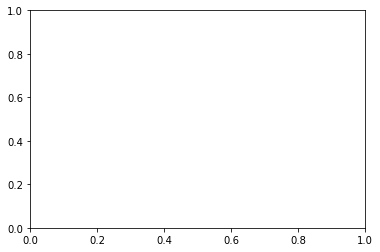

In [12]:
# Load dataset with xarray
ax = plt.subplot(111)
with xr.open_dataset('output_eddy.nc') as h:
    N = 20
    # plot contour every N
    ax.plot((h.speed_contour_longitude[::N].T + 180) % 360 - 180, h.speed_contour_latitude[::N].T, 'r')
    # plot path
    ax.plot((h.longitude + 180) % 360 - 180, h.latitude, 'b', label='eddy path')
    ax.set_aspect('equal')
    ax.legend()
    ax.grid()
plt.show()

In [39]:
dataset

<xarray.Dataset>
Dimensions:             (obs: 25871877)
Dimensions without coordinates: obs
Data variables:
    amplitude           (obs) float32 ...
    cyclonic_type       (obs) int8 ...
    latitude            (obs) float32 -40.0241 -40.0867 ... -28.5345 -28.5321
    longitude           (obs) float32 19.3175 19.2417 ... 256.402 256.405
    observation_number  (obs) uint16 ...
    observed_flag       (obs) int8 ...
    speed_average       (obs) float32 ...
    speed_radius        (obs) uint16 ...
    time                (obs) object ...
    track               (obs) uint32 0 0 0 0 0 ... 352416 352416 352416 352416
Attributes:
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    title:                     Mesoscale Eddies in Altimeter Observations of SLA
    institution:               CNES/CLS in collaboration with Oregon State Un...
    project:                   SSALTO/DUACS
    creator_url:               http://www.aviso.altimetry.fr
    creator_email:             aviso@altimetry.fr
    license:                   http://www.aviso.altimetry.fr/fileadmin/docume...
    summary:                   This dataset contains eddy atlas from two-sate...
    comment:                   Surface product; mesoscale eddies
    input_product_reference:   https://www.aviso.altimetry.fr/en/data/product...
    date_created:              2018-09-19T15:34:04Z
    time_coverage_duration:    P9148D
    time_coverage_start:       1993-01-01T00:00:00Z
    time_coverage_end:         2018-01-18T00:00:00Z
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    product_version:           2.0.exp

In [38]:
?np.in1d

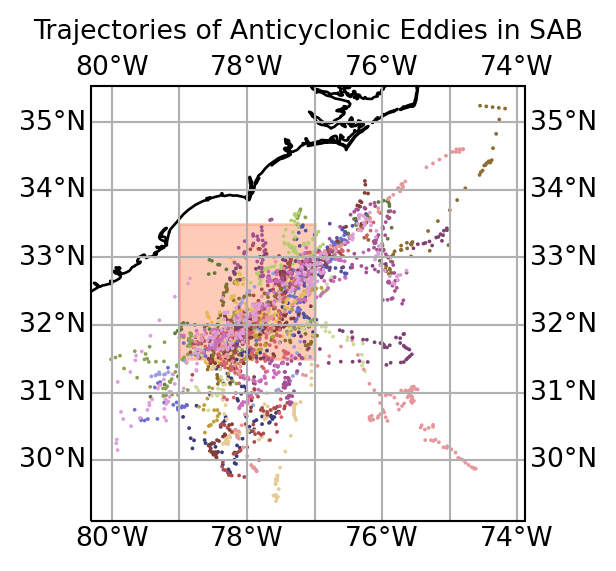

In [7]:
#!/usr/bin/env python# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

# Load dataset with xarray
dataset = xr.open_dataset(fp)

# Projection
proj=ccrs.PlateCarree()

#------------------------------------------------------------------------------------------#
# Select all eddies which go throught a given area and which have a lifespan over 500 days #
#------------------------------------------------------------------------------------------#


# Bounds of the area
lon_min, lon_max, lat_min, lat_max = -79+360, -77+360, 31.5, 33.5


# Select all observation in the area
subset = dataset.sel(
    obs=(dataset.longitude > lon_min) & (dataset.longitude < lon_max) & (dataset.latitude > lat_min) & (dataset.latitude < lat_max))
# Create a mask with all the trajectories passing throught the area
# Create the subset with the mask
subset = dataset.isel(obs=np.in1d(dataset.track, subset.track))
# Find all the trajecotries which are longer than X days
subset_lon_life =subset.sel(obs=subset.observation_number>10)
# Create the final subset
subset = subset.isel(obs=np.in1d(subset.track, subset_lon_life.track))

subset_lon_life =subset.sel(obs=subset.observation_number<100)
# Create the final subset
subset = subset.isel(obs=np.in1d(subset.track, subset_lon_life.track))

subset_anticyc = subset.sel(obs=subset.cyclonic_type==1)
subset = subset.isel(obs=np.in1d(subset.track, subset_anticyc.track))

# Store subset to further analyse
#subset.to_netcdf('eddy_trajectory_area_days_more500.nc')

# Create figure
fig = plt.figure(figsize=(5,3),dpi=96*2)
# Create subplot
ax = fig.add_subplot(111, projection=proj)

# Draw area
ax.fill(
    [lon_min, lon_max, lon_max, lon_min, lon_min],
    [lat_min, lat_min, lat_max, lat_max, lat_min],
    color='coral',
    transform=proj,
    alpha=0.4,
    zorder=0)

# Plot selected data
ax.scatter(
    subset.longitude,
    subset.latitude,
    c=subset.track,
    s=2,
    transform=proj,
    linewidth=0,
    cmap='tab20b')
# Add title
ax.set_title("Trajectories of Anticyclonic Eddies in SAB", fontsize=10)
# Active meridian/parallel
ax.gridlines(draw_labels=True)
# Active coastline
ax.coastlines()
# Display figure
plt.show()



In [8]:
subset

<xarray.Dataset>
Dimensions:             (obs: 2662)
Dimensions without coordinates: obs
Data variables:
    amplitude           (obs) float32 ...
    cyclonic_type       (obs) int8 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    latitude            (obs) float32 31.8944 31.9802 ... 31.9001 31.9763
    longitude           (obs) float32 282.979 282.925 282.84 ... 281.78 281.976
    observation_number  (obs) uint16 0 1 2 3 4 5 6 7 ... 23 24 25 26 27 28 29 30
    observed_flag       (obs) int8 ...
    speed_average       (obs) float32 ...
    speed_radius        (obs) uint16 ...
    time                (obs) object ...
    track               (obs) uint32 4857 4857 4857 ... 170333 170333 170333
Attributes:
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    title:                     Mesoscale Eddies in Altimeter Observations of SLA
    institution:               CNES/CLS in collaboration with Oregon State Un...
    project:                   SSALTO/DUACS
    creator_url:               http://www.aviso.altimetry.fr
    creator_email:             aviso@altimetry.fr
    license:                   http://www.aviso.altimetry.fr/fileadmin/docume...
    summary:                   This dataset contains eddy atlas from two-sate...
    comment:                   Surface product; mesoscale eddies
    input_product_reference:   https://www.aviso.altimetry.fr/en/data/product...
    date_created:              2018-09-19T15:34:04Z
    time_coverage_duration:    P9148D
    time_coverage_start:       1993-01-01T00:00:00Z
    time_coverage_end:         2018-01-18T00:00:00Z
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    product_version:           2.0.exp

In [9]:
# over almost 30 years only captures this many unique cyclonic features
np.unique(subset.track.values).shape

(65,)

In [10]:
np.unique(subset.track.values)

array([  4857,  12020,  18942,  20205,  22176,  22806,  25574,  27905,
        29069,  33407,  37418,  43465,  45748,  46623,  50536,  51736,
        53136,  55956,  62029,  66025,  68370,  72147,  75211,  79091,
        81088,  82024,  86900,  88479,  90563,  92964,  97972,  98620,
       100724, 101640, 105672, 106401, 107999, 110113, 114066, 114997,
       114998, 120769, 121891, 125448, 129714, 132215, 133017, 134942,
       139822, 140210, 142093, 147288, 149706, 150811, 153372, 154910,
       158333, 159172, 160174, 162348, 162909, 166509, 168077, 168483,
       170333], dtype=uint32)

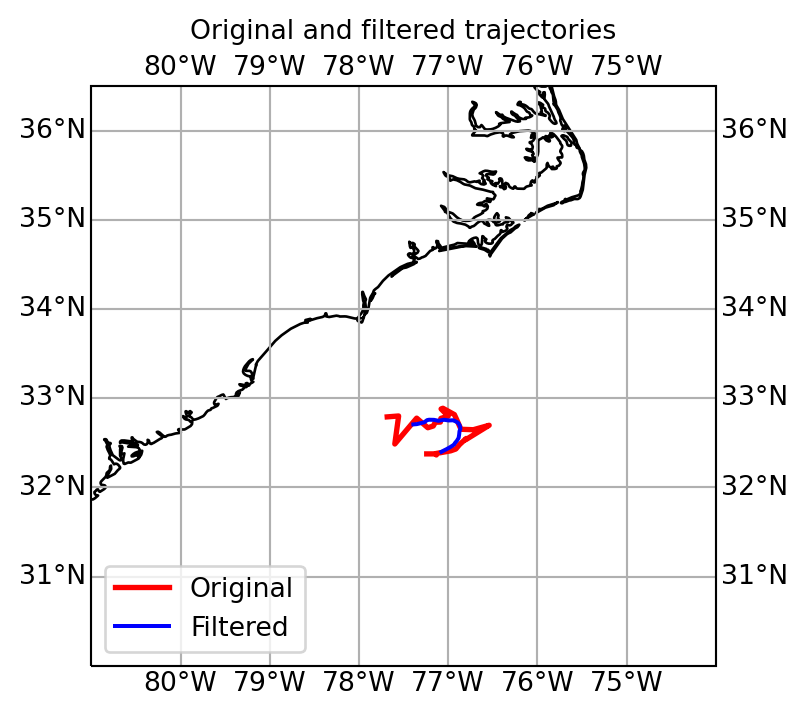

In [30]:
#------------------------------------------------------------------------#
# Follow a given eddy, plot its filtered trajectory and the original one #
#------------------------------------------------------------------------#

# Select a specific eddy and save
subset = dataset.sel(obs=dataset.track==154910)


# Filter the position with a rolling mean
windows_kwargs = dict(min_periods=7, obs=14, center=True)
new_lon = subset.longitude.rolling(** windows_kwargs).mean()
new_lat = subset.latitude.rolling(** windows_kwargs).mean()

# Create figure
fig = plt.figure(figsize=(10,4),dpi=96*2)
# Create subplot
ax = fig.add_subplot(111, projection=proj)
# Plot the two tracks
ax.plot(subset.longitude, subset.latitude, color='r', linewidth=2, label='Original', transform=proj)
ax.plot(new_lon, new_lat, color='b', label='Filtered', transform=proj)
# Add title
ax.set_title("Original and filtered trajectories", fontsize=10)
# Active meridian/parallel
ax.gridlines(draw_labels=True)
# Active coastline
ax.coastlines()
# Legend
ax.legend(loc=3)

ax.set_ylim(30, 36.5)
ax.set_xlim(-81, -74)

#lon_min, lon_max, lat_min, lat_max = -81+360, -77+360, 31.5, 34.5

# Display figure
plt.show()

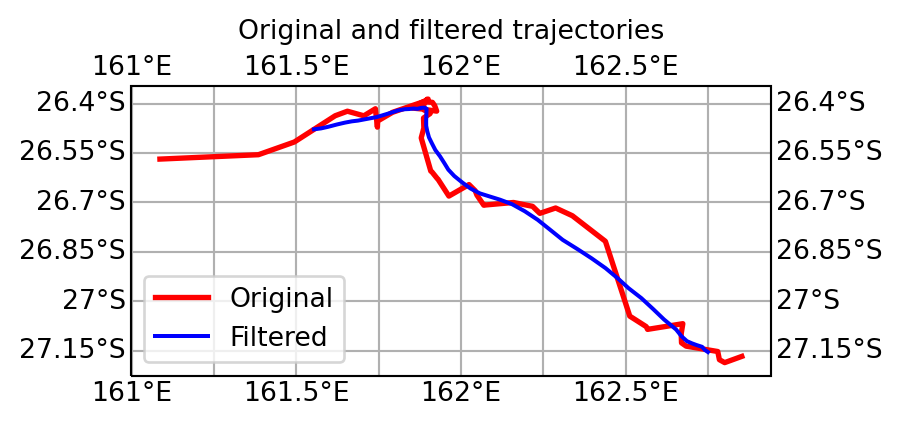

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


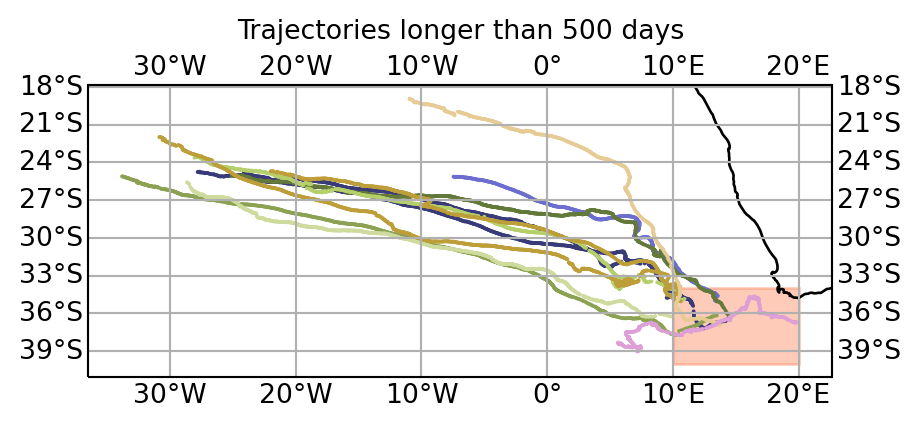

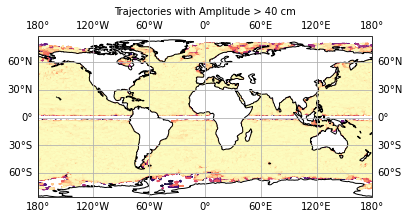

KeyboardInterrupt: 

In [13]:
#!/usr/bin/env python# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

# Load dataset with xarray
dataset = xr.open_dataset(fp)

# Projection
proj=ccrs.PlateCarree()

#------------------------------------------------------------------------#
# Follow a given eddy, plot its filtered trajectory and the original one #
#------------------------------------------------------------------------#

# Select a specific eddy and save
subset = dataset.sel(obs=dataset.track==151011)
# Store the selected trajectory
subset.to_netcdf('eddy_trajectory_151011.nc')

# Filter the position with a rolling mean
windows_kwargs = dict(min_periods=7, obs=14, center=True)
new_lon = subset.longitude.rolling(** windows_kwargs).mean()
new_lat = subset.latitude.rolling(** windows_kwargs).mean()

# Create figure
fig = plt.figure(figsize=(5,2),dpi=96*2)
# Create subplot
ax = fig.add_subplot(111, projection=proj)
# Plot the two tracks
ax.plot(subset.longitude, subset.latitude, color='r', linewidth=2, label='Original', transform=proj)
ax.plot(new_lon, new_lat, color='b', label='Filtered', transform=proj)
# Add title
ax.set_title("Original and filtered trajectories", fontsize=10)
# Active meridian/parallel
ax.gridlines(draw_labels=True)
# Active coastline
ax.coastlines()
# Legend
ax.legend(loc=3)

# Display figure
plt.show()

#------------------------------------------------------------------------------------------#
# Select all eddies which go throught a given area and which have a lifespan over 500 days #
#------------------------------------------------------------------------------------------#


# Bounds of the area
lon_min, lon_max, lat_min, lat_max = 10, 20, -40, -34


# Select all observation in the area
subset = dataset.sel(
    obs=(dataset.longitude > lon_min) & (dataset.longitude < lon_max) & (dataset.latitude > lat_min) & (dataset.latitude < lat_max))
# Create a mask with all the trajectories passing throught the area
# Create the subset with the mask
subset = dataset.isel(obs=np.in1d(dataset.track, subset.track))
# Find all the trajecotries which are longer than 500 days
subset_lon_life =subset.sel(obs=subset.observation_number>500)
# Create the final subset
subset = subset.isel(obs=np.in1d(subset.track, subset_lon_life.track))

# Store subset to further analyse
subset.to_netcdf('eddy_trajectory_area_days_more500.nc')

# Create figure
fig = plt.figure(figsize=(5,3),dpi=96*2)
# Create subplot
ax = fig.add_subplot(111, projection=proj)

# Draw area
ax.fill(
    [lon_min, lon_max, lon_max, lon_min, lon_min],
    [lat_min, lat_min, lat_max, lat_max, lat_min],
    color='coral',
    transform=proj,
    alpha=0.4,
    zorder=0)

# Plot selected data
ax.scatter(
    subset.longitude,
    subset.latitude,
    c=subset.track,
    s=2,
    transform=proj,
    linewidth=0,
    cmap='tab20b')
# Add title
ax.set_title("Trajectories longer than 500 days", fontsize=10)
# Active meridian/parallel
ax.gridlines(draw_labels=True)
# Active coastline
ax.coastlines()
# Display figure
plt.show()

#------------------------------------------------#
# Select all eddies with an amplitude over 40 cm #
#------------------------------------------------#

# Selection of all eddies with an amplitude over 40 cm
subset = dataset.sel(obs=dataset.amplitude>0.40)
# Create the corresponding subset : trajectories with at least one eddy with Amp > 40 cm
subset = dataset.isel(obs=np.in1d(dataset.track, subset.track))

# Create figure
fig = plt.figure()
# Create subplot
ax = fig.add_subplot(111, projection=proj)

# Plot selected data
ax.scatter(
    subset.longitude,
    subset.latitude,
    c=subset.track,
    s=2,
    transform=proj,
    linewidth=0,
    cmap='magma')
# Add title
ax.set_title("Trajectories with Amplitude > 40 cm", fontsize=10)
# Active meridian/parallel
ax.gridlines(draw_labels=True)
# Active coastline
ax.coastlines()

# Display figure
plt.show()

# Save in a netcdf file 
subset.to_netcdf('eddy_trajectory_amplitude_more40.nc')




In [ ]:
#----------------------------------------------------------------------------------------------
# Select all eddies which go throught a given area and which have a lifespan more than 500 days
#----------------------------------------------------------------------------------------------

# Create figure
fig = plt.figure()
# Create subplot
ax = fig.add_subplot(111, projection=proj)

# Bounds of the area
lon_min, lon_max, lat_min, lat_max = 15, 25, -40, -34
# Draw area
ax.fill(
    [lon_min, lon_max, lon_max, lon_min, lon_min],
    [lat_min, lat_min, lat_max, lat_max, lat_min],
    color='coral',
    transform=proj,
    alpha=0.4,
    zorder=30)

# Select all observation in the area
subset = dataset.sel(
    obs=(dataset.longitude > lon_min) & (dataset.longitude < lon_max) & (dataset.latitude > lat_min) & (dataset.latitude < lat_max))
# Create a mask with all track which go throught the area
# Create the subset with the mask
subset = dataset.isel(obs=np.in1d(dataset.track, subset.track))
# Find all the track which are longer than 500 days
subset_lon_life =subset.sel(obs=subset.observation_number>500)
# Create the final subset
subset = subset.isel(obs=np.in1d(subset.track, subset_lon_life.track))
# Plot selected data
ax.scatter(
    subset.longitude,
    subset.latitude,
    c=subset.track,
    label='All tracks longer than 500 days',
    s=5,
    transform=proj,
    linewidth=0,
    cmap='Dark2')
# Active meridian/parallel
ax.gridlines()
# Active coastline
ax.coastlines()
# Legend
ax.legend()

# Store subset to further analyse
subset.to_netcdf('eddy_trajectory_area_days_more500.nc')

# Display figure
plt.show()

# Selection of all event with an amplitude over 40 cm
subset = dataset.sel(obs=dataset.amplitude>40.)
# save in netcdf file with same properties as before
subset.to_netcdf('eddy_trajectory_amplitude_more40.nc')


